# Analysis of Social Networks in Game of Thrones, Season 2

Data from: https://github.com/parshan-b/gameofthrones

# 1 - Data Import and Check

In [1]:
import os
import operator
from matplotlib.pyplot import figure
import pandas as pd

In [ ]:
#!pip install cdlib

In [3]:
import networkx as nx
import infomap
from cdlib import algorithms, viz, evaluation

In [4]:
edges = pd.read_csv("got-s2-edges.csv")

In [5]:
nodes = pd.read_csv("got-s2-nodes.csv")

In [6]:
edges.head()

,Source,Target,Weight,Season
0,CERSEI,TYRION,177,2
1,DAENERYS,JORAH,119,2
2,ARYA,JAQEN,113,2
3,DAVOS,STANNIS,111,2
4,JON,YGRITTE,110,2


In [7]:
len(nodes)

129

In [8]:
len(edges)

486

In [9]:
edges.Weight.describe()

count    486.000000
mean      12.687243
std       20.602095
min        2.000000
25%        3.000000
50%        5.000000
75%       12.000000
max      177.000000
Name: Weight, dtype: float64

In [10]:
2*len(edges)

972

# 2 - Shortest Paths

In [11]:
G = nx.from_pandas_edgelist(edges, "Source", "Target", create_using=nx.Graph(), edge_attr="Weight")

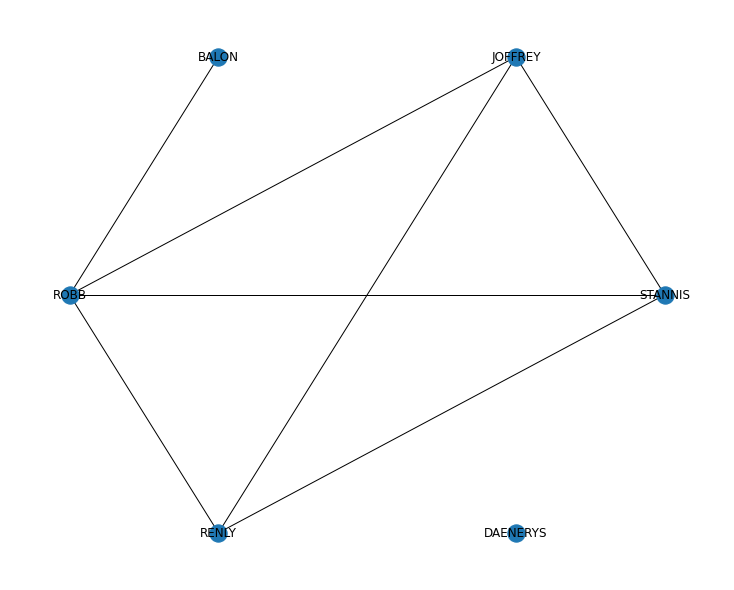

In [22]:
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes=["STANNIS","RENLY","JOFFREY","BALON","ROBB","DAENERYS"]), with_labels=True)

In [13]:
list(nx.shortest_path(G, source="STANNIS", target="JAQEN"))

['STANNIS', 'TYWIN', 'JAQEN']

In [14]:
nx.shortest_path_length(G, source="STANNIS", target="JAQEN")

2

# 3 - Node Importance (Degree Centrality, Betweenness Centrality, Closeness Centrality, PageRank)

In [15]:
result = nx.degree_centrality(G)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)
sorted_d

[('JOFFREY', 0.28125),
 ('TYRION', 0.2578125),
 ('CERSEI', 0.2421875),
 ('ROBB', 0.21875),
 ('ARYA', 0.2109375),
 ('TYWIN', 0.1953125),
 ('CATELYN', 0.1796875),
 ('STANNIS', 0.171875),
 ('THEON', 0.15625),
 ('LITTLEFINGER', 0.15625),
 ('NED', 0.15625),
 ('SANSA', 0.1484375),
 ('JAIME', 0.140625),
 ('LORAS', 0.125),
 ('DAVOS', 0.1171875),
 ('BRONN', 0.1171875),
 ('ROBERT', 0.1171875),
 ('VARYS', 0.109375),
 ('PYCELLE', 0.109375),
 ('HOUND', 0.109375),
 ('DAENERYS', 0.1015625),
 ('BRAN', 0.1015625),
 ('BRIENNE', 0.1015625),
 ('RENLY', 0.1015625),
 ('JON', 0.09375),
 ('SHAE', 0.09375),
 ('TOMMEN', 0.09375),
 ('JANOS', 0.0859375),
 ('PODRICK', 0.0859375),
 ('GENDRY', 0.078125),
 ('DAGMER', 0.078125),
 ('MAESTER_LUWIN', 0.078125),
 ('LANCEL', 0.078125),
 ('RICKON', 0.078125),
 ('MYRCELLA', 0.078125),
 ('JORAH', 0.0703125),
 ('XARO', 0.0703125),
 ('MATTHOS', 0.0703125),
 ('SAM', 0.0703125),
 ('MARGAERY', 0.0703125),
 ('JAQEN', 0.0625),
 ('TALISA', 0.0625),
 ('MELISANDRE', 0.0625),
 ('OSHA', 

In [16]:
result = nx.betweenness_centrality(G)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)
sorted_d

[('ARYA', 0.15104217250782007),
 ('TYRION', 0.14108037444122806),
 ('ROBB', 0.11704699582237152),
 ('JON', 0.11087767788061645),
 ('NED', 0.10431444702553139),
 ('JOFFREY', 0.10049862632402745),
 ('THEON', 0.08555810575183234),
 ('CATELYN', 0.06520519055130626),
 ('TYWIN', 0.06464758652813404),
 ('CERSEI', 0.06115998137352083),
 ('JAIME', 0.05977063114030665),
 ('JEOR', 0.04306253520107021),
 ('DAVOS', 0.03441323636275063),
 ('BRAN', 0.029562110304778604),
 ('SAM', 0.028589356312585155),
 ('STANNIS', 0.024570609238985765),
 ('JANOS', 0.024016132561074686),
 ('LITTLEFINGER', 0.02288067034757203),
 ('SANSA', 0.02201279295762214),
 ('RICKON', 0.018123727341651574),
 ('ROBERT', 0.017798102144355482),
 ('RENLY', 0.01621043932181221),
 ('MYRCELLA', 0.015996627489578506),
 ('CRASTER', 0.014768818254842376),
 ('MAESTER_LUWIN', 0.014454868681479088),
 ('ROOSE_BOLTON', 0.01390255905511811),
 ('VARYS', 0.010808942520044624),
 ('LORAS', 0.009321367175978224),
 ('RODRIK', 0.009286901039022546),
 ('

In [17]:
result = nx.closeness_centrality(G)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)
sorted_d

[('TYRION', 0.47667253521126757),
 ('JOFFREY', 0.47667253521126757),
 ('NED', 0.4615056818181818),
 ('ROBB', 0.45125000000000004),
 ('CERSEI', 0.4472742290748899),
 ('CATELYN', 0.443367903930131),
 ('ARYA', 0.4302171610169491),
 ('SANSA', 0.4284018987341772),
 ('LITTLEFINGER', 0.4284018987341772),
 ('TYWIN', 0.42660189075630256),
 ('JAIME', 0.4212914937759336),
 ('STANNIS', 0.4127286585365854),
 ('VARYS', 0.3981617647058824),
 ('ROBERT', 0.3981617647058824),
 ('THEON', 0.39353197674418605),
 ('LORAS', 0.3920125482625483),
 ('HOUND', 0.38752385496183206),
 ('PYCELLE', 0.3665388086642599),
 ('BRONN', 0.3639112903225807),
 ('BRAN', 0.3639112903225807),
 ('BRIENNE', 0.3639112903225807),
 ('DAVOS', 0.3626116071428571),
 ('ALTON', 0.35876766784452296),
 ('RENLY', 0.35876766784452296),
 ('SHAE', 0.35625),
 ('MATTHOS', 0.3550043706293706),
 ('TOMMEN', 0.3525390625),
 ('JANOS', 0.35010775862068966),
 ('PODRICK', 0.3489046391752577),
 ('LANCEL', 0.3477097602739726),
 ('MYRCELLA', 0.3477097602739

In [18]:
result = nx.pagerank(G)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)
sorted_d

[('JOFFREY', 0.029361684689808154),
 ('TYRION', 0.028264878305951854),
 ('ARYA', 0.027389124196995487),
 ('ROBB', 0.026183956294545688),
 ('CERSEI', 0.025062377521028145),
 ('TYWIN', 0.02174997368706136),
 ('THEON', 0.019945681957348894),
 ('CATELYN', 0.019257426667142964),
 ('DAENERYS', 0.019099818027990025),
 ('STANNIS', 0.01750205318552669),
 ('NED', 0.016843866211496857),
 ('LITTLEFINGER', 0.016242971262581916),
 ('SANSA', 0.015296658574171156),
 ('JAIME', 0.015157177582644558),
 ('JON', 0.014714619018704298),
 ('DAVOS', 0.01434622165444695),
 ('SAM', 0.013515208242395684),
 ('LORAS', 0.012871774427963159),
 ('ROBERT', 0.012595006091497404),
 ('BRAN', 0.012228032603857913),
 ('BRONN', 0.012058742223970577),
 ('JORAH', 0.012054578260653405),
 ('XARO', 0.012054578260653405),
 ('PYCELLE', 0.01168715266023493),
 ('RENLY', 0.011588404206080538),
 ('VARYS', 0.011407344375324723),
 ('HOUND', 0.011152978468871382),
 ('BRIENNE', 0.011059696571850776),
 ('MAESTER_LUWIN', 0.010957294971075988

In [19]:
G

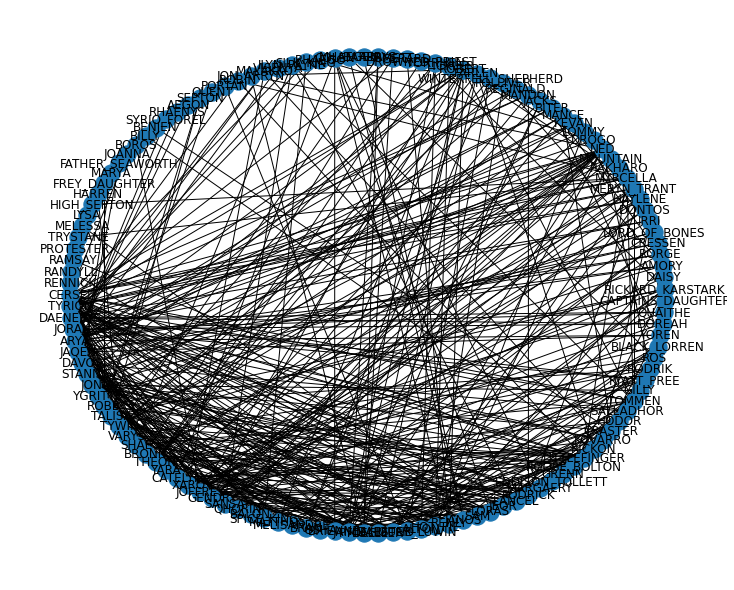

In [20]:
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [46]:
nodes_interest = list(edges[edges.Target == "DAENERYS"].Source) + ["DAENERYS"]

In [47]:
nodes_interest = nodes_interest + list(edges[edges.Source == "DAENERYS"].Target)

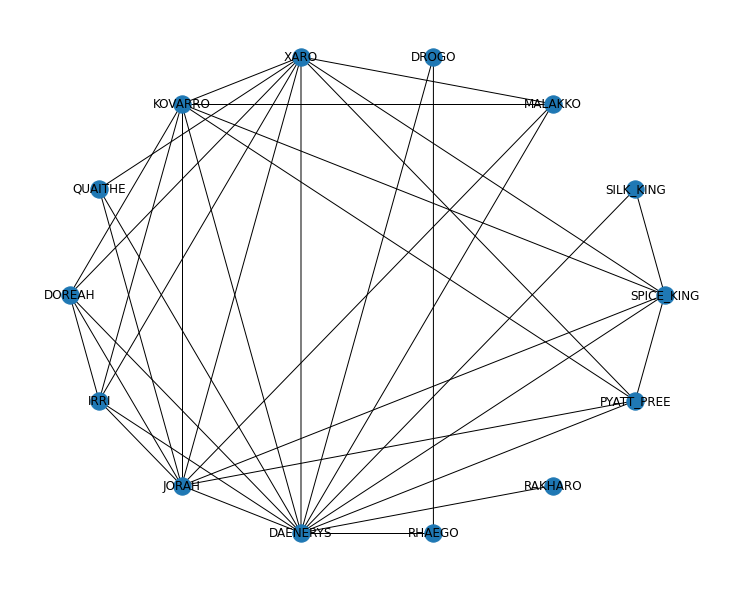

In [48]:
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes=nodes_interest), with_labels=True)

In [65]:
coms_edge_betweenness = algorithms.girvan_newman(G, level=3)

In [93]:
pos = nx.layout.fruchterman_reingold_layout(G)

In [96]:
show_labels = ["STANNIS","RENLY","JOFFREY","BALON","ROBB","DAENERYS"]


# 4 - Community Detection

## Edge Betweenness

Community List: [['BARRA', 'ROBB', 'JOANNA', 'MANDON', 'BRONN', 'RENLY', 'MARGAERY', 'LORAS', 'MERYN_TRANT', 'RAMSAY', 'SHAE', 'HOUND', 'JANOS', 'COLEN', 'RICKARD_KARSTARK', 'DAVOS', 'ROBERT', 'QUENT', 'SANSA', 'VARYS', 'TYRION', 'PYCELLE', 'DONTOS', 'FATHER_SEAWORTH', 'TIMETT', 'HARREN', 'GERARD', 'BRIENNE', 'TOMMEN', 'NED', 'CRESSEN', 'PROTESTER', 'MELISANDRE', 'CERSEI', 'TYWIN', 'ROBIN', 'AERYS', 'MARYA', 'MATTHOS', 'TRYSTANE', 'HIGH_SEPTON', 'DAISY', 'STANNIS', 'HAYLENE', 'ROS', 'BALON', 'RENNICK', 'LITTLEFINGER', 'PODRICK', 'SEPTON', 'JACKS', 'TALISA', 'FREY_DAUGHTER', 'MHAEGEN', 'MYRCELLA', 'LYSA', 'BOROS', 'ILYN_PAYNE', 'KEVAN', 'TORRHEN', 'ALTON', 'JAIME', 'CATELYN', 'ROOSE_BOLTON', 'SALLADHOR', 'JON_ARRYN', 'JOFFREY', 'LANCEL'], ['YOREN', 'TICKLER', 'BITER', 'ARYA', 'LOMMY', 'HOT_PIE', 'MOUNTAIN', 'POLLIVER', 'REGINALD', 'VISENYA', 'JAQEN', 'AEGON', 'AMORY', 'GENDRY', 'SYRIO_FOREL', 'RORGE', 'RHAENYS'], ['FARLEN', 'OSHA', 'RODRIK', 'MAESTER_LUWIN', 'BILLY', 'DAGMER', 'BLACK_LO

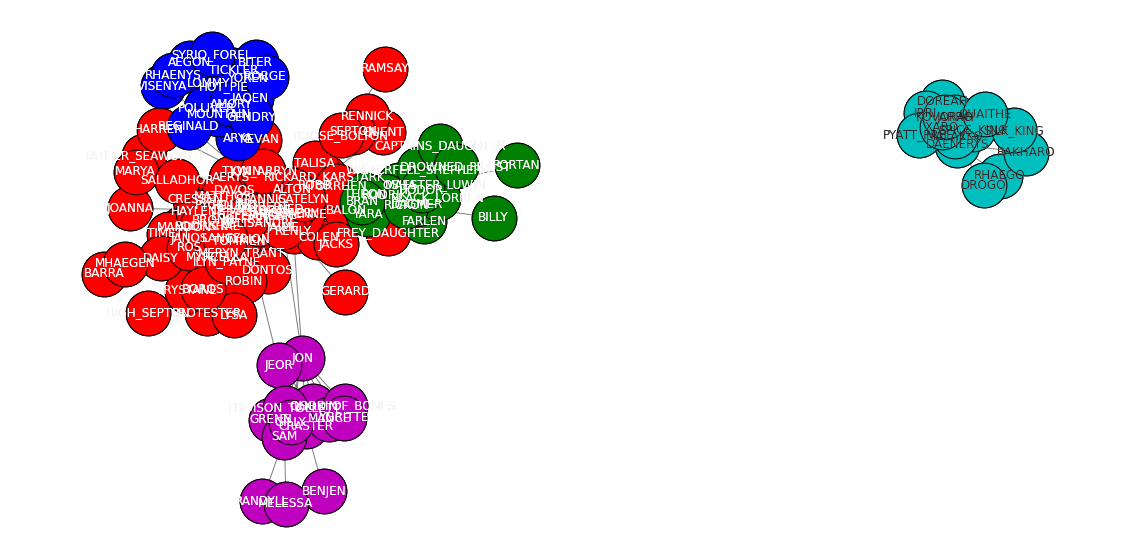

In [113]:
viz.plot_network_clusters(G, coms_edge_betweenness, pos, plot_labels=True, figsize =(20,10), node_size=2000)
print("Community List: " + str(coms_edge_betweenness.communities))
print("Conductance: " + str(coms_edge_betweenness.conductance()))
print("Expansion: " + str(coms_edge_betweenness.expansion()))
print("Internal Density: " + str(coms_edge_betweenness.internal_edge_density()))

## Louvain Modularity

Louvain Modularity is a two-step algorithm that seeks to optimize and aggregate nodes into communities, where nodes within a community have dense connections while having distance connections in other communities. The resolution parameter is a hyper parameter to chose here and after using the elbow method, a resolution of 1.2 was selected. The elbow method output, algorithm scores, and the 5 genearted communities are shown below.

In [146]:
coms_louvain = algorithms.louvain(G, resolution=1.2)
print("Community List: " + str(coms_louvain.communities))
print("Conductance: " + str(coms_louvain.conductance()))
print("Expansion: " + str(coms_louvain.expansion()))
print("Internal Density: " + str(coms_louvain.internal_edge_density()))

Community List: [['CERSEI', 'TYRION', 'VARYS', 'SHAE', 'BRONN', 'JOFFREY', 'SANSA', 'PYCELLE', 'HOUND', 'JANOS', 'LANCEL', 'PODRICK', 'LITTLEFINGER', 'TOMMEN', 'ROS', 'DAISY', 'DONTOS', 'HAYLENE', 'MERYN_TRANT', 'MYRCELLA', 'MANDON', 'TIMETT', 'BARRA', 'MHAEGEN', 'ILYN_PAYNE', 'ROBIN', 'BOROS', 'JOANNA', 'HIGH_SEPTON', 'LYSA', 'TRYSTANE', 'PROTESTER'], ['DAVOS', 'STANNIS', 'TALISA', 'CATELYN', 'MATTHOS', 'MELISANDRE', 'BRIENNE', 'JAIME', 'ALTON', 'RENLY', 'LORAS', 'MARGAERY', 'ROOSE_BOLTON', 'SALLADHOR', 'RICKARD_KARSTARK', 'CRESSEN', 'JACKS', 'ROBERT', 'TORRHEN', 'GERARD', 'AERYS', 'COLEN', 'SEPTON', 'FATHER_SEAWORTH', 'MARYA', 'RAMSAY'], ['ROBB', 'THEON', 'YARA', 'BALON', 'BRAN', 'OSHA', 'DAGMER', 'MAESTER_LUWIN', 'RICKON', 'HODOR', 'RODRIK', 'BLACK_LORREN', 'CAPTAINS_DAUGHTER', 'NED', 'WINTERFELL_SHEPHERD', 'FARLEN', 'DROWNED_PRIEST', 'JON_ARRYN', 'PORTAN', 'QUENT', 'BILLY', 'FREY_DAUGHTER', 'RENNICK'], ['ARYA', 'JAQEN', 'TYWIN', 'GENDRY', 'HOT_PIE', 'YOREN', 'AMORY', 'RORGE', 'MOUN

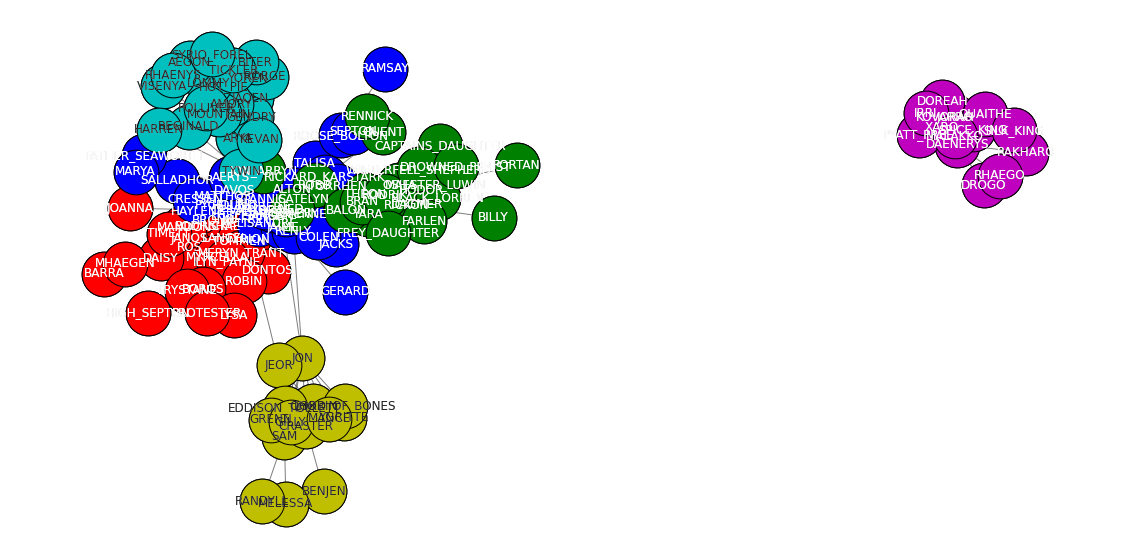

In [147]:
viz.plot_network_clusters(G, coms_louvain, pos, plot_labels=True, figsize =(20,10), node_size=2000)

In [138]:
import numpy as np
val = []
for i in np.arange(0,5,0.05):
    coms_louvain = algorithms.louvain(G, resolution=i)
    val.append(coms_louvain.newman_girvan_modularity().score)

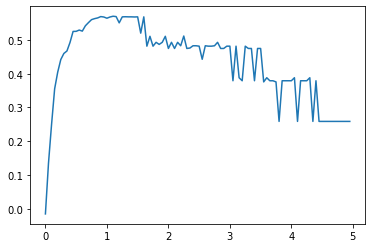

In [139]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0,5,0.05), val)

Similar to the Edge Betweenness algorithm the Louvain Modularity algorithm has also generated 5 communities. The communities are similar in description to before (please note some of the colours have swapped); however, this time around the large Red community that was presented in Edge Betweenness has reduced in size. For example, Robb Stark is now grouped with Bran Stark and the Winterfell crowd, which makes sense considering their familiar ties and geographic closeness.

## InfoMap 

The InfoMap algorithm operates similarly to the Louvain algorithm, but it uses a map-equation instead of modularity. This enables InfoMap to leave outliers out of communities, which means that more clusters may be created as a result. The results are shown below.

In [150]:
coms_infomap = algorithms.infomap(G)

Community List: [['CERSEI', 'TYRION', 'VARYS', 'SHAE', 'BRONN', 'JOFFREY', 'SANSA', 'PYCELLE', 'HOUND', 'JANOS', 'LANCEL', 'PODRICK', 'LITTLEFINGER', 'TOMMEN', 'ROS', 'DAISY', 'DONTOS', 'HAYLENE', 'MERYN_TRANT', 'MYRCELLA', 'MANDON', 'ROBERT', 'TIMETT', 'AERYS', 'BARRA', 'MHAEGEN', 'ILYN_PAYNE', 'JON_ARRYN', 'ROBIN', 'BOROS', 'JOANNA', 'HIGH_SEPTON', 'LYSA', 'TRYSTANE', 'PROTESTER'], ['ARYA', 'JAQEN', 'TYWIN', 'GENDRY', 'HOT_PIE', 'YOREN', 'AMORY', 'RORGE', 'MOUNTAIN', 'LOMMY', 'KEVAN', 'BITER', 'REGINALD', 'POLLIVER', 'TICKLER', 'VISENYA', 'AEGON', 'RHAENYS', 'SYRIO_FOREL', 'HARREN'], ['DAVOS', 'STANNIS', 'CATELYN', 'MATTHOS', 'MELISANDRE', 'BRIENNE', 'RENLY', 'LORAS', 'MARGAERY', 'SALLADHOR', 'CRESSEN', 'JACKS', 'GERARD', 'COLEN', 'FATHER_SEAWORTH', 'MARYA'], ['THEON', 'BRAN', 'OSHA', 'DAGMER', 'MAESTER_LUWIN', 'RICKON', 'HODOR', 'RODRIK', 'BLACK_LORREN', 'CAPTAINS_DAUGHTER', 'WINTERFELL_SHEPHERD', 'FARLEN', 'DROWNED_PRIEST', 'PORTAN', 'BILLY'], ['DAENERYS', 'JORAH', 'XARO', 'SPICE_K

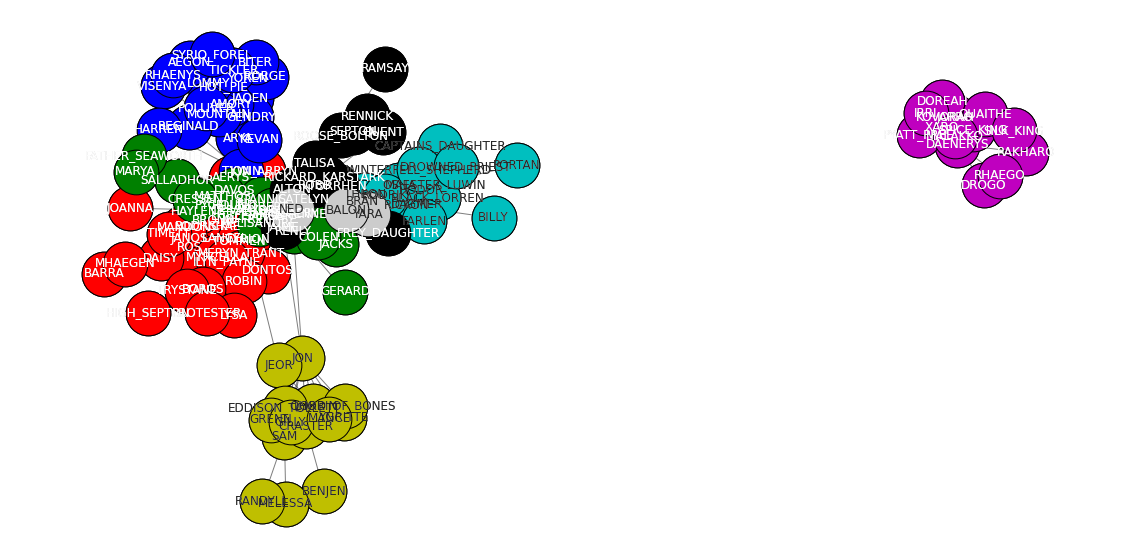

In [152]:
viz.plot_network_clusters(G, coms_infomap, pos, plot_labels=True, figsize =(20,10), node_size=2000)
print("Community List: " + str(coms_infomap.communities))
print("Conductance: " + str(coms_infomap.conductance()))
print("Expansion: " + str(coms_infomap.expansion()))
print("Internal Density: " + str(coms_infomap.internal_edge_density()))

The InfoMap algorithm has generated 8 communities, instead of 5 generated by Edge Betweenness and Louvain. These communities are much more detailed and, in my opinion, more accurate to how the communities in Season 2 were. The 8 communities are summarized below: 

1. King’s Landing Community [red] – including Joffrey, Tyrion, Cersei, Littlefinger, etc. residing in capital of King’s Landing 

2. Harrenhal Castle Community [blue] – including Arya, Jaqen, Tywin, the Mountain residing in the castle of Harrenhal north of King’s Landing 

3. Stormlands Community [green] – including Stannis, Renly, Davos, Melisandre, etc. residing in the Stormlands in the East 

4. Winterfell Community [teal] – including Bran, Theon, Hodor, etc. residing in the castle of Winterfell in the North 

5. Beyond the Wall Community [dark yellow] – including Jon and the rest of the Night’s Watch who are beyond the wall at the northern edges of Westeros 

6. King in the North Community [black] – including Robb and his followers who are attacking King’s Landing from the North 

7. Essos Community [purple] – including Daenerys, Jorah, and other characters in the continent of Essos 

8. Outliers [grey] – this includes Balon and Yara; who are isolated on an Island, as well as Ned, who is a dead character



# 5 - Selection of Best Community Detection Algorithm

For someone who was not have familiar with the show to know that InfoMap has created the best communities, they can compare the different scores of the algorithms regarding conductance and expansion (lower score is better), and internal density (higher score is better) to select the best one.

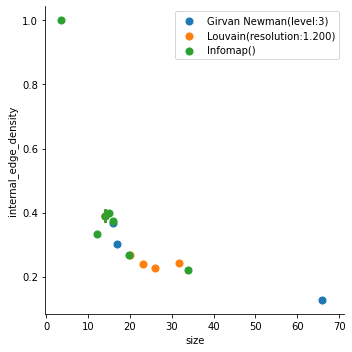

In [153]:
lmplot = viz.plot_com_properties_relation([coms_edge_betweenness,coms_louvain, coms_infomap],evaluation.size,evaluation.internal_edge_density)

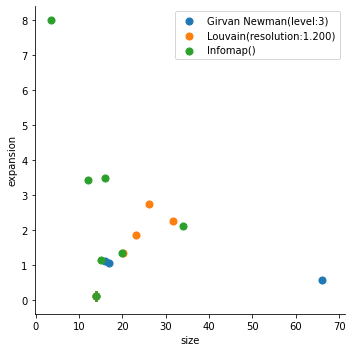

In [154]:
lmplot = viz.plot_com_properties_relation([coms_edge_betweenness,coms_louvain, coms_infomap],evaluation.size,evaluation.expansion)

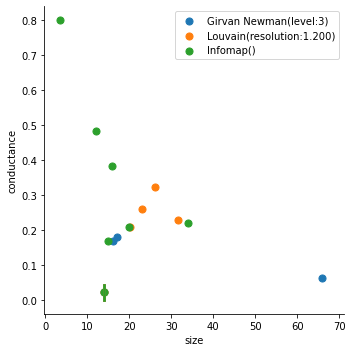

In [163]:
lmplot = viz.plot_com_properties_relation([coms_edge_betweenness,coms_louvain, coms_infomap],evaluation.size,evaluation.conductance)

From these algorithm’s scores, InfoMap seems to have mostly equal sized, smaller communities with higher densities, which is good. However, in terms of expansion and conductance, InfoMap does not seem to be performing as well as the other two.